In [20]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import random
import torch

from src.action import Action
from src.agent import Agent
from src.config import Config
from src.episode import Episode
from src.policy import Policy
from src.state import State
from src.world import World

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random agent action history
----

In [21]:
episode = Episode.new()
episode.run_steps_by_random(steps=20)

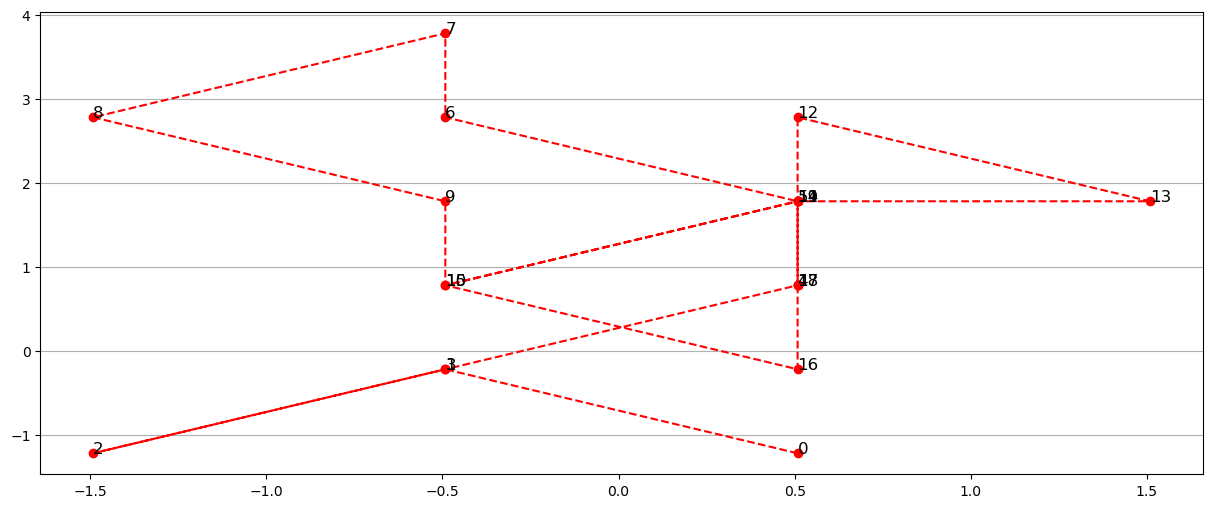

In [22]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

# Policy Guide agent action history
----

In [65]:
episode = Episode.new()
policy = Policy(config=episode.config)

episode.run_steps_by_policy(steps=20, policy=policy, debug=False)
print(f"episode gain: {episode.gain()}")

episode gain: 20.0


/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


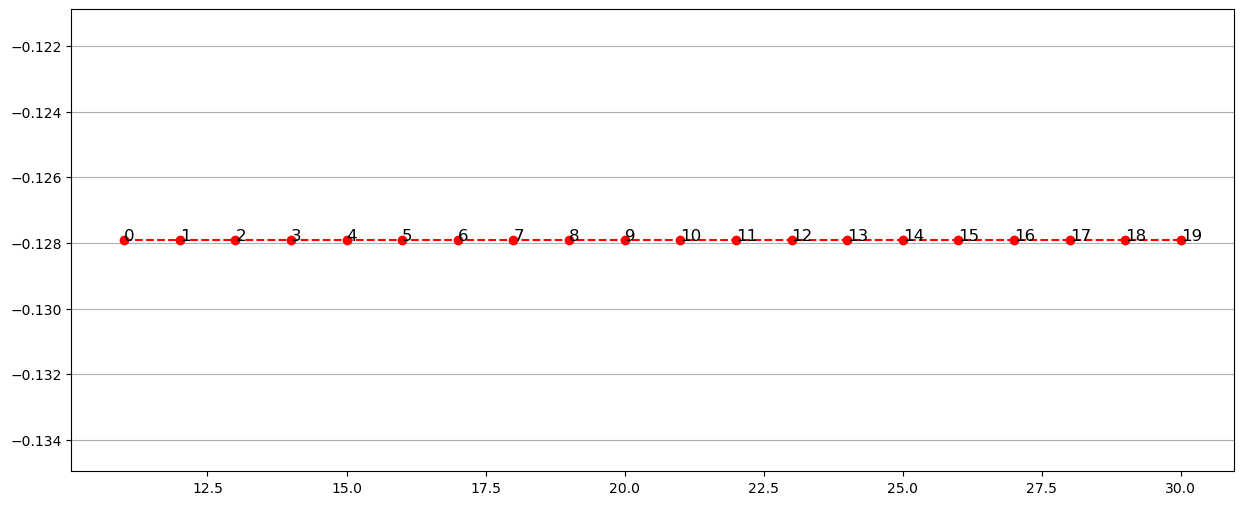

In [66]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()

In [74]:
# episode.agent.action_history

# TRAIN Policy
----

In [ ]:
episode = Episode.new()
policy = Policy(config=episode.config)

for epoch in range(episode.config.epoches):
    episode.train(steps=20, policy=policy, debug=False)
    print(f"episode gain: {episode.gain()}")

episode gain: -20.0


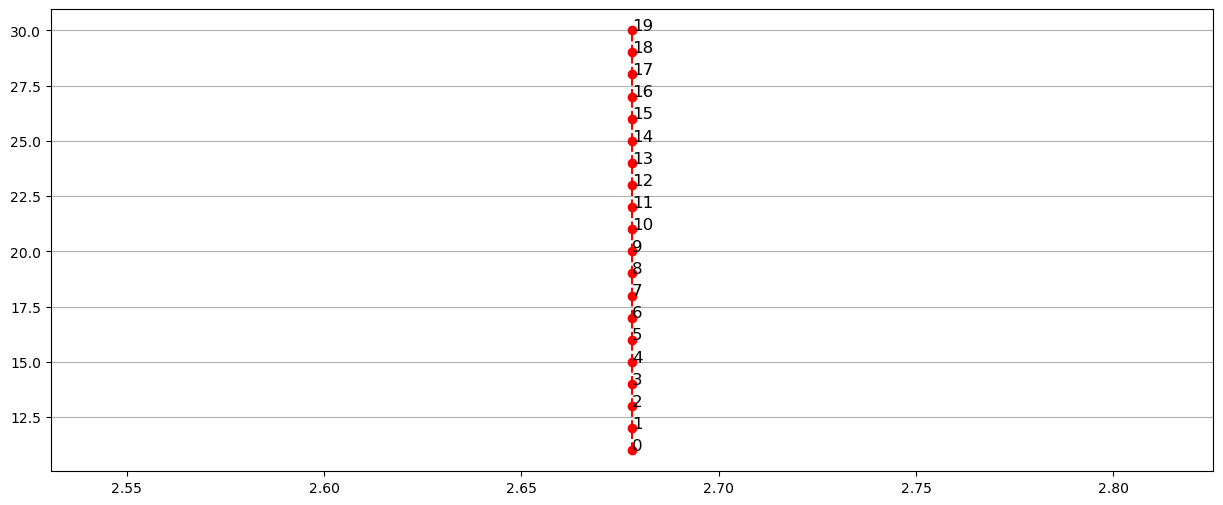

In [73]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1)
episode.viz(ax=ax)
plt.show()